<h1><center>The use of Sigmoid function to model dataset</center></h1>
In this lab, we are going to fit a non-linear model to the datapoints corrensponding to China's GDP from 1960 to 2014.
<br/> Sigmoid function (Logistic function) will be used.


<h2 id="importing_libraries">Importing required libraries</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<h2 id="downloading dataset">Downloading Dataset</h2> 
We are going to download a dataset with two columns, the first, a year between 1960 and 2014, the second, China's corresponding annual gross domestic income in US dollars for that year. The dataset is available on IBM Cloud Object Storage. <br/> We use "urllib.request" to download the dataset directly. A very handy module !

In [2]:
import urllib.request
url = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv'
filename = 'china_gdp.csv'
urllib.request.urlretrieve(url, filename)

('china_gdp.csv', <http.client.HTTPMessage at 0x122488d10>)

In [3]:
df = pd.read_csv("china_gdp.csv")
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


<h1 id="Plotting the data"> Plotting the Data<\h1>

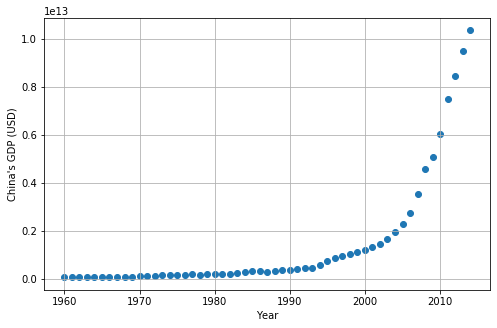

In [4]:
plt.figure(figsize=(8,5))
plt.grid(True)
plt.scatter(df.Year, df.Value)
plt.xlabel("Year")
plt.ylabel("China's GDP (USD)")
plt.show()

<h1 id="Choosing a model">Choosing a Model<\h1>

As we can see, the plot has the property of starting with a slow growth, then increasing growth.
We think that, by using Sigmoid funcntion having a S-shaped curve, we can acheive a good approximation.

The formula for sigmoid function is:

$$ S = \frac1{1+e^{-\alpha(X-\beta)}}$$

$\alpha$: Controls the curve's steepness,

$\beta$: Slides the curve on the x-axis.

<h1 id="Building the model"> Building Model</h1>

Here, we define our Sigmoid function, then we initialize its parameters.

In [5]:
def sigmoid(x, alpha, Beta):
     y = 1 / (1 + np.exp(-alpha*(x-Beta)))
     return y

We initialize the function for $\alpha = 1$ and $\beta = 2000$.

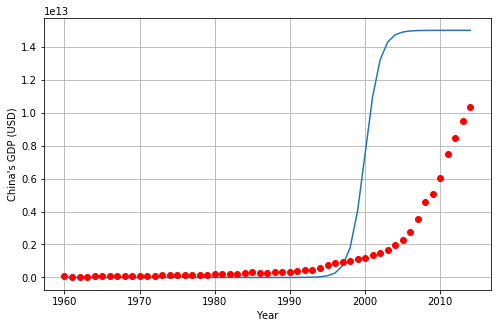

In [6]:
alpha = 1.0
beta = 2000.0

x_data, y_data = (df["Year"].values, df["Value"].values)

#Sigmoid function
Y_pred = sigmoid(x_data, alpha , beta)

#plot initial prediction against datapoints
plt.figure(figsize=(8,5))
plt.grid(True)
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')
plt.xlabel("Year")
plt.ylabel("China's GDP (USD)")
plt.show()

Now, our purpose is to find the right parameters so that the sigmoid function fits our dataset as well as possible.</br>
For that, we can use curve_fit, which applies the method of non-linear least squares to fit the data. In practice, curve_fit computes the optimal values of the parameters by minimizing sigmoid(x_data, alpha_opt, beta_opt)-y_data, where alpha_opt and beta_opt are our optimized parameters. 

Let's get the optimized parameters in our case. </br>
First, we normalize the data.

In [7]:
x_data, y_data = (x_data/max(x_data), y_data/max(y_data))

Then, we fit the datapoints.

In [8]:
from scipy.optimize import curve_fit
p_opt, p_cov = curve_fit(sigmoid, x_data, y_data)

#print the final parameters
print(" alpha_opt = %f, beta_opt = %f" % (p_opt[0], p_opt[1]))

 alpha_opt = 690.453018, beta_opt = 0.997207


Now we can plot our resulting model.

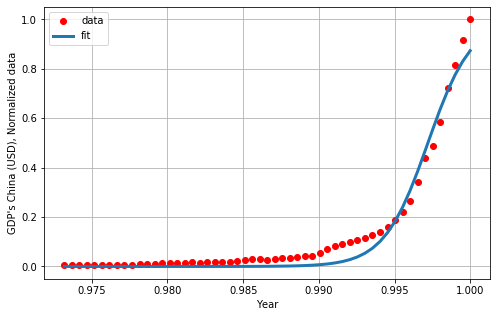

In [9]:
x = np.linspace(1960, 2014, 55)
x = x/max(x)
y = sigmoid(x, *p_opt)

plt.figure(figsize=(8,5))
plt.grid(True)
plt.plot(x_data, y_data, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel("GDP's China (USD), Normalized data")
plt.xlabel('Year')
plt.show()

As we can notine, the model fits pretty vell the datapoints. Some statistical measures can be used in order to evaluate the accuracy of the model like R-squared, Mean Squared Error (MSE)... 

This lab is inspired by Saeed Aghabozorgi's course on Learning machine.<\br>
Saeed Aghabozorgi is a Data Scientist in IBM